<a href="https://colab.research.google.com/github/ZionOchayon/Machine-Learning-Deep-Learning-Image-Processing/blob/main/FU_vs_SI_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries:

In [ ]:
import os
import zipfile
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras import layers
import keras
from keras.models import load_model
from keras.preprocessing import image
from keras.callbacks import TensorBoard
import tensorflow as tf


##Unzip and create a 4-d tensor:

In [ ]:
with zipfile.ZipFile('main.zip', 'r') as zip_ref:
    zip_ref.extractall('main')

In [ ]:
base_directory = '/content/main/'  # Change this to your base directory
subfolder = 'fu_vs_si-main'    # Change this to your subfolder name

full_path = os.path.join(base_directory, subfolder)
contents = os.listdir(full_path)

print(contents)


['fu_images.zip', 'si_images.zip']


In [ ]:
with zipfile.ZipFile('/content/main/fu_vs_si-main/fu_images.zip', 'r') as zip_ref:
    zip_ref.extractall('fu_images')

In [ ]:
with zipfile.ZipFile('/content/main/fu_vs_si-main/si_images.zip', 'r') as zip_ref:
    zip_ref.extractall('si_images')

In [ ]:
image_dir = '/content/fu_images'  # Directory containing your images
image_size = (80, 60)  # Resize images to this size

images = []
labels = []

for label in os.listdir(image_dir):
    label_dir = os.path.join(image_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        img = Image.open(image_path).resize(image_size)
        img_array = np.array(img)
        images.append(img_array)
        labels.append(label)

fu_images = np.array(images)
fu_labels = np.array(labels)


In [ ]:
image_dir = '/content/si_images'  # Directory containing your images
image_size = (80, 60)  # Resize images to this size

images = []
labels = []

for label in os.listdir(image_dir):
    label_dir = os.path.join(image_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        img = Image.open(image_path).resize(image_size)
        img_array = np.array(img)
        images.append(img_array)
        labels.append(label)

si_images = np.array(images)
si_labels = np.array(labels)


In [ ]:
fu_images.shape

(5100, 60, 80, 3)

In [ ]:
si_labels

array(['si_images', 'si_images', 'si_images', ..., 'si_images',
       'si_images', 'si_images'], dtype='<U9')

In [ ]:
Total_images = np.concatenate((fu_images, si_images))
Total_images.shape

(10200, 60, 80, 3)

In [ ]:
Total_labels=np.concatenate((fu_labels, si_labels))
Total_labels.shape

(10200,)

In [ ]:
Total_labels_numeric=LabelEncoder().fit_transform(Total_labels)
Total_labels_numeric #0 is fu, 1 is si

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
fu_images[0]

array([[[ 24,  19,  23],
        [ 29,  24,  28],
        [ 37,  31,  33],
        ...,
        [ 35,  30,  24],
        [ 35,  30,  24],
        [ 35,  30,  24]],

       [[ 35,  29,  33],
        [ 43,  37,  41],
        [ 53,  47,  49],
        ...,
        [ 43,  38,  32],
        [ 43,  38,  32],
        [ 43,  38,  32]],

       [[ 37,  28,  33],
        [ 45,  36,  41],
        [ 56,  47,  50],
        ...,
        [ 43,  38,  32],
        [ 43,  38,  32],
        [ 43,  38,  32]],

       ...,

       [[ 43,  74,  79],
        [ 48,  75,  66],
        [ 73,  95,  59],
        ...,
        [ 83,  71,  47],
        [ 79,  65,  39],
        [ 74,  60,  34]],

       [[ 51,  82,  77],
        [ 40,  68,  46],
        [127, 147,  94],
        ...,
        [ 85,  70,  47],
        [ 73,  57,  32],
        [ 78,  62,  37]],

       [[ 45,  77,  66],
        [ 53,  82,  54],
        [146, 166, 103],
        ...,
        [ 84,  69,  46],
        [ 73,  57,  32],
        [ 80,  62,  38]]

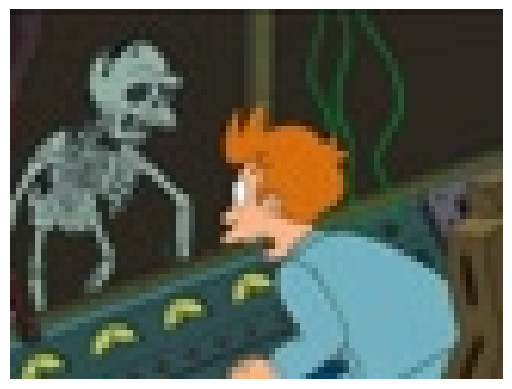

In [ ]:
plt.imshow(fu_images[0])  # For grayscale images
# plt.imshow(image_array)  # For color images
plt.axis('off')  # Turn off axes
plt.show()

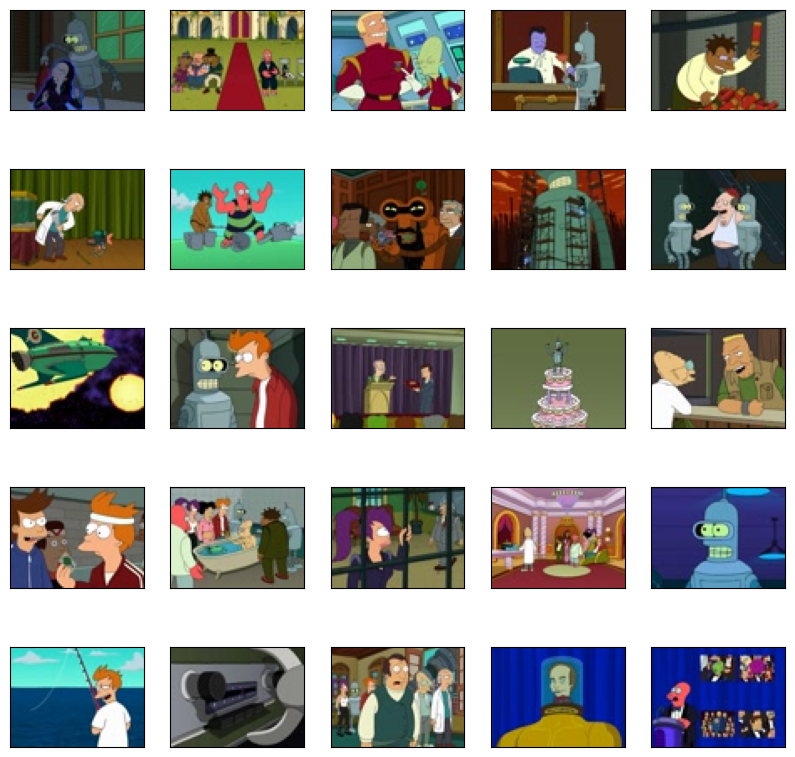

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fu_images[i+100], cmap=plt.cm.binary)
plt.show()

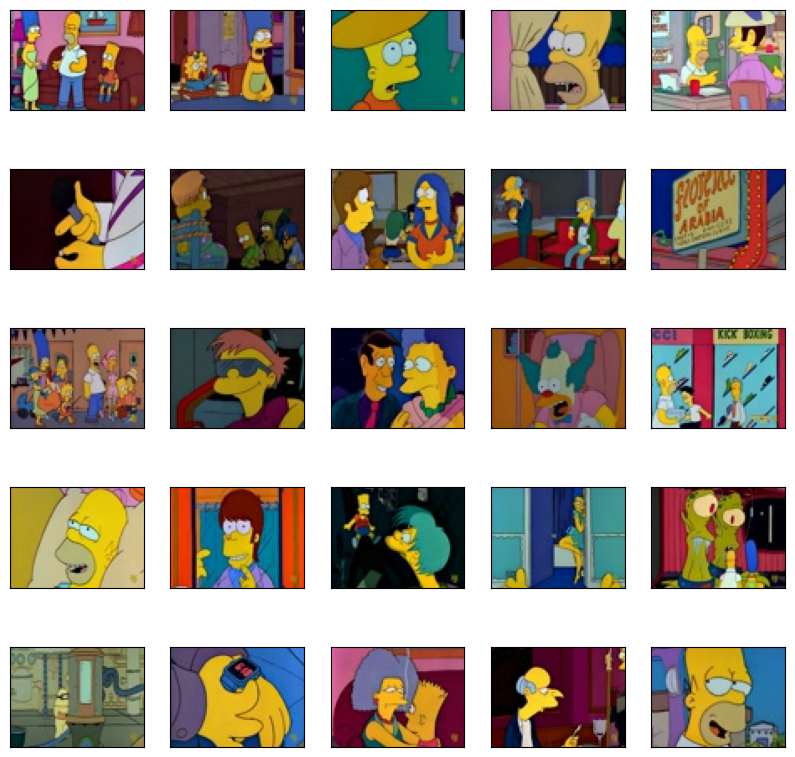

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(si_images[i+100], cmap=plt.cm.binary)
plt.show()

In [ ]:
Flattened_images = [image.ravel() for image in Total_images]
Flattened_images_array = np.array(Flattened_images)

Flattened_images_array.shape

(10200, 14400)

In [ ]:
x_train_flat, x_test_flat, y_train, y_test = train_test_split(Flattened_images_array,
                                                    Total_labels_numeric,
                                                    test_size=0.2,
                                                    random_state=0)
print(x_train_flat.shape)
print(y_train)

(8160, 14400)
['si_images' 'fu_images' 'si_images' ... 'fu_images' 'si_images'
 'fu_images']



#Training logistic regression model:


In [ ]:
logisticRegr = LogisticRegression(penalty=None)
logisticRegr.fit(x_train_flat, y_train)

LogisticRegression(penalty=None)

#Predict on test set:

In [ ]:
predictions = logisticRegr.predict(x_test_flat)
predictions

array(['fu_images', 'si_images', 'si_images', ..., 'fu_images',
       'fu_images', 'si_images'], dtype='<U9')

Use score method to get accuracy of the model

In [ ]:
score_train = logisticRegr.score(x_train_flat, y_train)
print(score_train)
score = logisticRegr.score(x_test_flat, y_test)
print(score)

0.983578431372549
0.8828431372549019


Confusion Matrix

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[863 127]
 [112 938]]


##plotting confusion matrix:


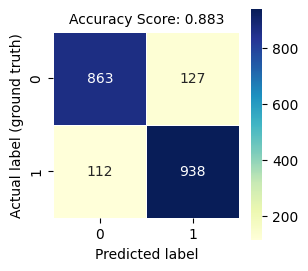

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label (ground truth)');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig('toy_si_fu_Confusion.png')

In [ ]:
print("Train matrix:\n" ,classification_report(y_train,logisticRegr.predict(x_train_flat)))

Train matrix:
               precision    recall  f1-score   support

   fu_images       0.99      0.98      0.98      4110
   si_images       0.98      0.99      0.98      4050

    accuracy                           0.98      8160
   macro avg       0.98      0.98      0.98      8160
weighted avg       0.98      0.98      0.98      8160



In [ ]:
print("Test matrix:\n" ,classification_report(y_test,predictions))

Test matrix:
               precision    recall  f1-score   support

   fu_images       0.89      0.87      0.88       990
   si_images       0.88      0.89      0.89      1050

    accuracy                           0.88      2040
   macro avg       0.88      0.88      0.88      2040
weighted avg       0.88      0.88      0.88      2040



#Neural nets:

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Total_images,
                                                    Total_labels_numeric,
                                                    test_size=0.2,
                                                    random_state=0)
print(x_train.shape)
print(y_train)

(8160, 60, 80, 3)
[1 0 1 ... 0 1 0]


In [ ]:
model_NN = keras.Sequential([
    keras.layers.Flatten(input_shape=(60,80,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10)
])

model_NN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1843328   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,844,618
Trainable params: 1,844,618
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_NN.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_NN.fit(x_train, y_train, epochs=10,batch_size=100)

Epoch 1/10
82/82 [==============================] - 4s 45ms/step - loss: 165.3153 - accuracy: 0.5794
Epoch 2/10
82/82 [==============================] - 3s 39ms/step - loss: 1.9897 - accuracy: 0.5892
Epoch 3/10
82/82 [==============================] - 3s 40ms/step - loss: 2.0041 - accuracy: 0.5042
Epoch 4/10
82/82 [==============================] - 4s 55ms/step - loss: 1.8727 - accuracy: 0.5036
Epoch 5/10
82/82 [==============================] - 4s 48ms/step - loss: 1.7593 - accuracy: 0.5042
Epoch 6/10
82/82 [==============================] - 3s 40ms/step - loss: 1.6527 - accuracy: 0.5039
Epoch 7/10
82/82 [==============================] - 4s 48ms/step - loss: 1.5628 - accuracy: 0.4972
Epoch 8/10
82/82 [==============================] - 4s 48ms/step - loss: 1.4818 - accuracy: 0.4975
Epoch 9/10
82/82 [==============================] - 3s 42ms/step - loss: 1.4067 - accuracy: 0.4936
Epoch 10/10
82/82 [==============================] - 3s 42ms/step - loss: 1.3407 - accuracy: 0.4966


In [ ]:
train_loss, train_acc = model_NN.evaluate(x_train,  y_train, verbose=2)

print('\nTrain accuracy:', train_acc)

test_loss, test_acc = model_NN.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

255/255 - 2s - loss: 1.3090 - accuracy: 0.4968 - 2s/epoch - 7ms/step

Train accuracy: 0.49681371450424194
64/64 - 1s - loss: 1.3094 - accuracy: 0.5147 - 975ms/epoch - 15ms/step

Test accuracy: 0.5147058963775635


Did the net do OK?

Any idea on how to improve it?

#CNN

In [ ]:
# Model / data parameters
num_classes = 2
input_shape = (60, 80, 3)

# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(y_train, num_classes)
test_labels = keras.utils.to_categorical(y_test, num_classes)

## Build the model

In [ ]:
model_CNN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 14976)             0         
                                                                 
 dropout_2 (Dropout)         (None, 14976)            

## Train the model

In [ ]:
# Specify the log directory (You can adjust this path)
log_dir = '/content/tensorboard_logs'
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)


In [ ]:
batch_size = 128
epochs = 10

model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_CNN.fit(x_train, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[tensorboard_callback])

Epoch 1/10
58/58 [==============================] - 62s 1s/step - loss: 0.2952 - accuracy: 0.8931 - val_loss: 0.3191 - val_accuracy: 0.9020
Epoch 2/10
58/58 [==============================] - 86s 1s/step - loss: 0.1626 - accuracy: 0.9402 - val_loss: 0.2509 - val_accuracy: 0.9216
Epoch 3/10
58/58 [==============================] - 79s 1s/step - loss: 0.1361 - accuracy: 0.9493 - val_loss: 0.1841 - val_accuracy: 0.9387
Epoch 4/10
58/58 [==============================] - 79s 1s/step - loss: 0.1308 - accuracy: 0.9508 - val_loss: 0.2184 - val_accuracy: 0.9350
Epoch 5/10
58/58 [==============================] - 71s 1s/step - loss: 0.1309 - accuracy: 0.9522 - val_loss: 0.1801 - val_accuracy: 0.9289
Epoch 6/10
58/58 [==============================] - 58s 1s/step - loss: 0.1486 - accuracy: 0.9488 - val_loss: 0.2085 - val_accuracy: 0.9326
Epoch 7/10
58/58 [==============================] - 59s 1s/step - loss: 0.1407 - accuracy: 0.9530 - val_loss: 0.2043 - val_accuracy: 0.9314
Epoch 8/10
58/58 [==

In [ ]:
%load_ext tensorboard


In [ ]:
%tensorboard --logdir /content/tensorboard_logs


#Save and load pre-trained models:


In [ ]:
#https://www.tensorflow.org/guide/keras/serialization_and_saving
model_CNN.save("FU_vs_SI_CNN.h5")

In [ ]:
model_CNN=load_model("FU_vs_SI_CNN.h5")

## Evaluate the trained model

In [ ]:
score_train = model_CNN.evaluate(x_train, train_labels, verbose=0)
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[1])

Train loss: 0.13461166620254517
Train accuracy: 0.9556372761726379


In [ ]:
score = model_CNN.evaluate(x_test, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.20900055766105652
Test accuracy: 0.9299019575119019
